Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv("user_data.csv")
logs = pd.read_csv("logs.csv")

In [3]:
user_data.shape, logs.shape

((2954, 3), (4500, 4))

In [4]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [5]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [10]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [11]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


Какой клиент совершил больше всего успешных операций? (success == True)

In [18]:
logs.query("success == True").groupby(["client"], as_index=False).agg({"success":"count"}).sort_values("success", ascending=False).head(1)

,client,success
332,12179,41


С какой платформы осуществляется наибольшее количество успешных операций?

In [20]:
logs.query("success == True").groupby(["platform"], as_index=False).agg({"success":"count"}).sort_values("success", ascending=False).head(1)

,platform,success
1,phone,2019


In [22]:
premium_users = user_data.query("premium == True")
premium_users.head()

,client,premium,age
22,74867,True,27
23,49379,True,25
24,88203,True,35
29,32603,True,20
51,53182,True,24


Какую платформу предпочитают премиумные клиенты?

In [24]:
premium_users_logs = premium_users.merge(logs, on=["client"], how="inner") 

In [28]:
premium_users_logs.\
    groupby(["platform"], as_index=False).\
    agg({"client":"count"}).\
    rename(columns={"client":"operations_count"}).\
    sort_values("operations_count", ascending=False)

,platform,operations_count
1,phone,246
0,computer,150
2,tablet,24


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [31]:
premium_users = user_data.query("premium == True")
premium_users.head()

,client,premium,age
22,74867,True,27
23,49379,True,25
24,88203,True,35
29,32603,True,20
51,53182,True,24


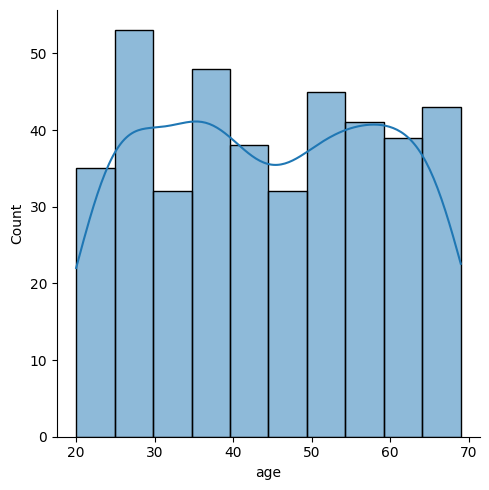

In [48]:
sns.displot(premium_users.age, kde=True)
plt.show()

In [49]:
not_premium_users = user_data.query("premium == False")
not_premium_users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


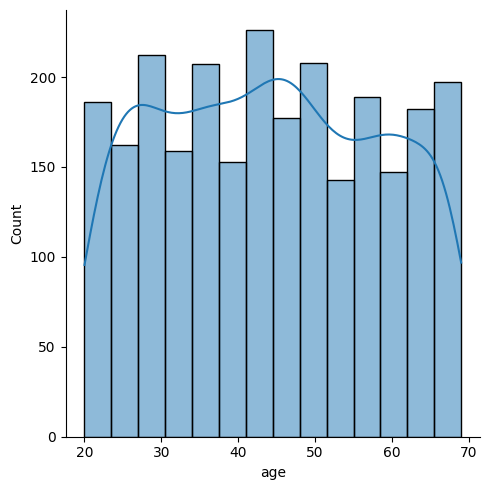

In [50]:
sns.displot(not_premium_users.age, kde=True)
plt.show()

Постройте график распределения числа успешных операций

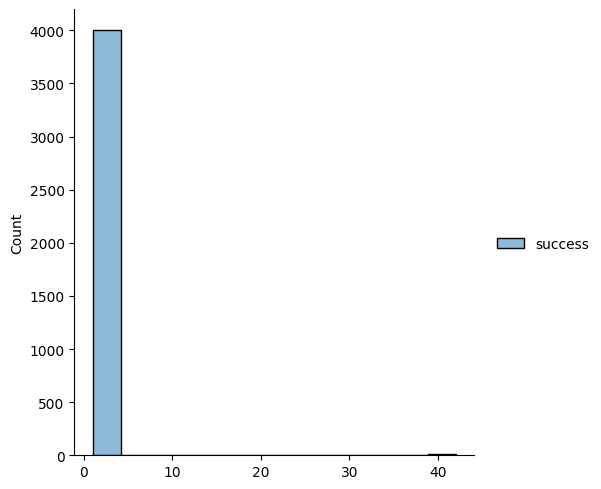

In [98]:
sns.displot(logs.groupby(["client"]).agg({"success":"count"}))

In [52]:
success_computer_operations = logs.query("success == True and platform == 'computer'")
success_computer_operations.head()

,client,success,platform,time
4,10931,True,computer,1585468629
7,32167,True,computer,1585457972
9,71087,True,computer,1585458446
11,502,True,computer,1585476186
13,51575,True,computer,1585409788


In [62]:
users_success_computer_operations = success_computer_operations.merge(user_data, on=["client"], how="inner")

In [63]:
users_success_computer_operations.head()

,client,success,platform,time,premium,age
0,10931,True,computer,1585468629,False,28
1,32167,True,computer,1585457972,False,42
2,71087,True,computer,1585458446,False,36
3,39975,True,computer,1585428343,False,69
4,99308,True,computer,1585409409,True,38


Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [102]:
users_success_computer_operations.groupby(["age"]).agg({"success": "count"})

,success
age,
20,11
21,15
22,8
23,15
24,26
25,33
26,14
27,14
28,49


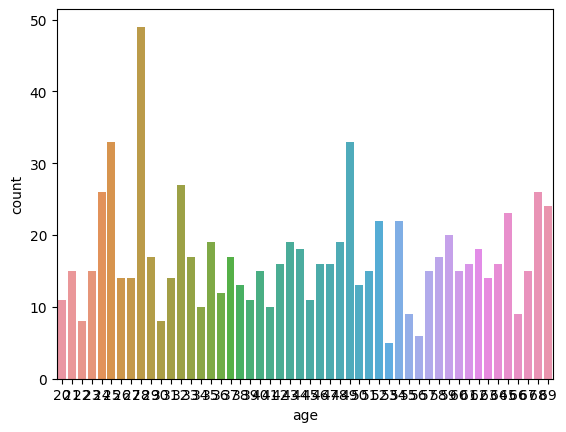

In [103]:
plt.figure(fig)
sns.countplot(x=users_success_computer_operations.age)
plt.show()

In [86]:
users_success_computer_operations.age.value_counts().idxmax()

28